<a href="https://www.kaggle.com/code/yujansaya/titanic-crystal-ball-to-live-or-not-to-live?scriptVersionId=160393064" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<h1>Visualize, Analyze and Predict: what were the chances to survive on Titanic.</h1>

<img src='https://nypost.com/wp-content/uploads/sites/2/2023/05/NYPICHPDPICT000011237810.jpg?quality=75&strip=all' style="width:800px;height:400px;display: block; margin-left: auto; margin-right: auto; ">

*Titanic was a British passenger liner, operated by the White Star Line, which sank in the North Atlantic Ocean on 15 April 1912 after striking an iceberg during her maiden voyage from Southampton, England, to New York City, United States. Of the estimated 2,224 passengers and crew aboard, more than 1,500 died, making it the deadliest sinking of a single ship up to that time. It remains the deadliest peacetime sinking of an ocean liner or cruise ship.*

<h2>Content</h2>
<ul>
  <li>Dataset EDA</li>
  <li>Dataset cleaning, feature selection and scaling</li>
  <li>Training and testing different algorithms:</li>
    <ul>
      <li>Logistic Regression</li>
      <li>Naive Bayes</li>
      <li>K-Nearest Neighbors</li>
      <li>Support Vector Machines (Regular and Kernel)</li> 
       <li>Decision Trees (Regular, Random Forset, XGBoost, CatBoost)</li>
      <li>Neural Network</li>
    </ul>
</ul>

**What do the datasets look like?**


1. PassengerId is the unique id of the row and it doesn't have any effect on target
2. Survived is the target variable we are trying to predict (0 or 1):
    *     1 = Survived
    *     0 = Not Survived
3. Pclass (Passenger Class) is the socio-economic status of the passenger and it is a categorical ordinal feature which has 3 unique values (1, 2 or 3):
    *    1 = Upper Class
    *    2 = Middle Class
    *    3 = Lower Class
4. Name
5. Sex
6. Age
7. SibSp is the total number of the passengers' siblings and spouse
8. Parch is the total number of the passengers' parents and children
9. Ticket is the ticket number of the passenger
10. Fare is the passenger fare
11. Cabin is the cabin number of the passenger
12. Embarked is port of embarkation and it is a categorical feature which has 3 unique values (C, Q or S):
    *         C = Cherbourg
    *         Q = Queenstown
    *         S = Southampton

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


**Import and explore the dataset.**

In [2]:
df_train = pd.read_csv('/kaggle/input/titanic/train.csv') 
df_test = pd.read_csv('/kaggle/input/titanic/test.csv')  
df_all = pd.concat([df_train, df_test])  # combine both datasets in order to fill the missing data with more approprate values

print(f'Number of Training Examples = {df_train.shape[0]}')
print(f'Number of Test Examples = {df_test.shape[0]}\n')
print(f'Training X Shape = {(df_train.shape)}')
print(f"Training y Shape = {df_train['Survived'].shape[0]}\n")
print(f'Test X Shape = {df_test.shape}')
print(f'Test y Shape = {df_test.shape[0]}\n')
print(df_train.columns)
print(df_test.columns)
print(df_train.info())
df_train.describe()

Number of Training Examples = 891
Number of Test Examples = 418

Training X Shape = (891, 12)
Training y Shape = 891

Test X Shape = (418, 11)
Test y Shape = 418

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# checking the number of missing values by columns in training set
print({col: df_train[col].isnull().sum() for col in df_train.columns.tolist()}) 

{'PassengerId': 0, 'Survived': 0, 'Pclass': 0, 'Name': 0, 'Sex': 0, 'Age': 177, 'SibSp': 0, 'Parch': 0, 'Ticket': 0, 'Fare': 0, 'Cabin': 687, 'Embarked': 2}


In [5]:
# checking the number of missing values by columns in test set
print({col: df_test[col].isnull().sum() for col in df_test.columns.tolist()}) 

{'PassengerId': 0, 'Pclass': 0, 'Name': 0, 'Sex': 0, 'Age': 86, 'SibSp': 0, 'Parch': 0, 'Ticket': 0, 'Fare': 1, 'Cabin': 327, 'Embarked': 0}


In [6]:
#checking if there are any duplicates
df_train.duplicated().sum()

0

In [7]:
df_train[df_train['Embarked']=='S'].count()  # we could fill the 2 missing values in Embarked Column with 'S' since it is the most frequent

PassengerId    644
Survived       644
Pclass         644
Name           644
Sex            644
Age            554
SibSp          644
Parch          644
Ticket         644
Fare           644
Cabin          129
Embarked       644
dtype: int64

In [8]:
df_all['Embarked'].fillna(df_train['Embarked'].mode()[0], inplace=True)
df_all['Embarked'].isnull().sum() 

0

**Transforming "Pclass" and "Sex" columns into labels. Assigning Female and more expensive class non-zero values since according to stats it makes difference in surviving rate.**

In [9]:
temp_pclass = [0 if value == 3 else 2 if value == 1 else 1 for index, value in df_all['Pclass'].items()]
df_all['Pclass'] = temp_pclass

temp_sex = [1 if value == 'female' else 0 for index, value in df_all['Sex'].items()]
df_all['Sex'] = temp_sex
df_all.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,0,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,0,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,2,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,0,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


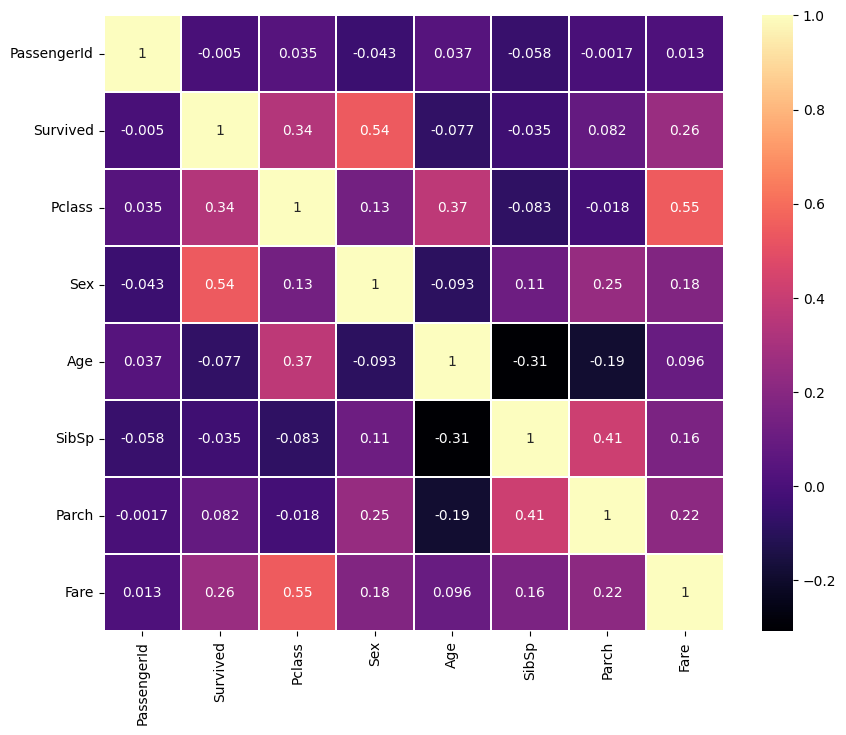

In [10]:
import seaborn as sns

'''Correlation Between The Features'''
sns.heatmap(df_all[:891].drop(columns=['Embarked', 'Name', 'Ticket', 'Cabin']).corr(),annot=True,cmap='magma',linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show() 

We can see correlation among Sex, Pclass and Fare. Seems like rich and female was a good combo for surviving Titanic. <br> <br>
Suprisingly, Age did not matter, on the contrast, the correlation is negative. Although it is pretty much correlated with Pclass.<br> <br>
Speaking of the number of siblings/Spouse and Parent/Children, there is some correlation. So for convenience, we further combine them by summing up in a new column "Relatives".

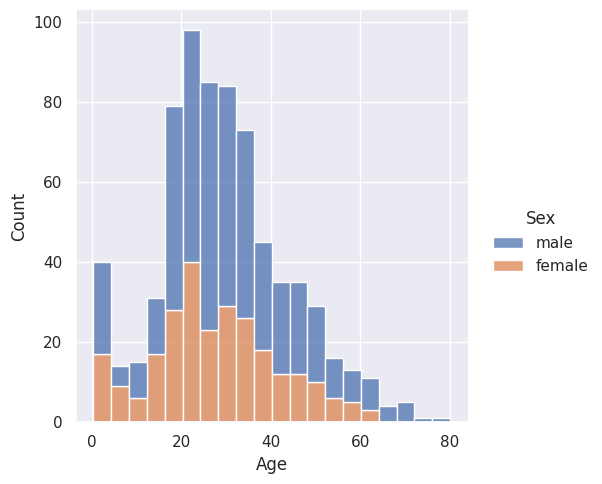

In [11]:
import seaborn as sns

sns.set(style="darkgrid")
sns.displot(data=df_train, x="Age", hue="Sex", multiple="stack")

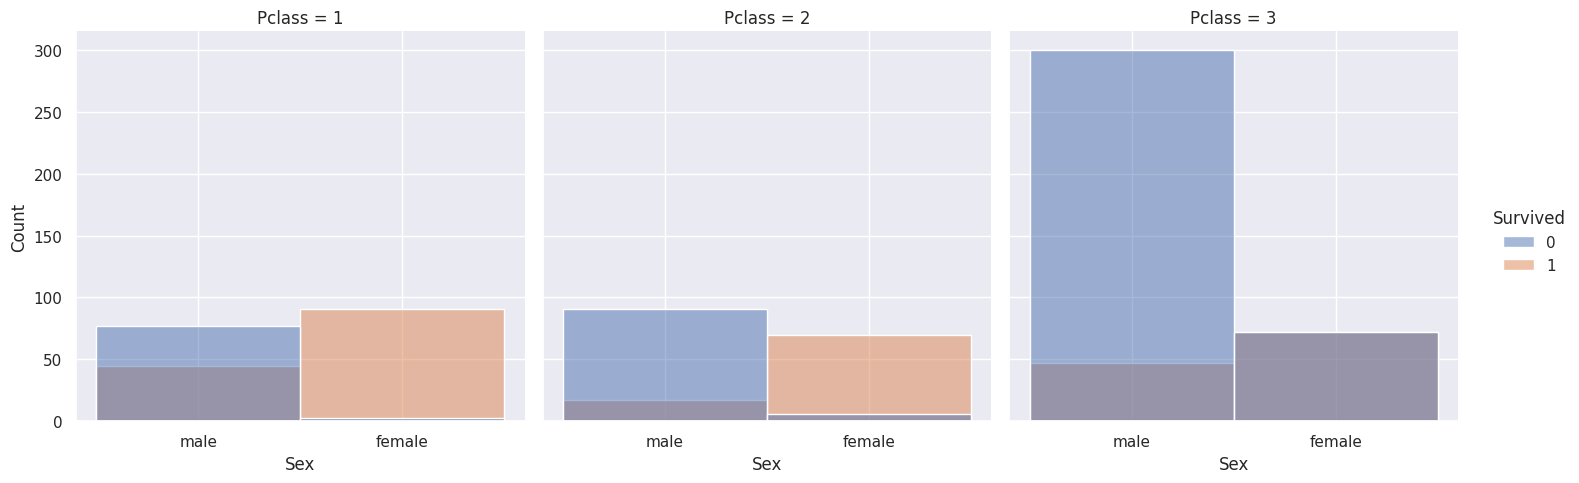

In [12]:
sns.displot(data=df_train, x="Sex", hue="Survived", col="Pclass")

In [13]:
df_train[(df_train['Sex'] == 'female') & (df_train['Pclass'] == 1)]['Survived'].sum()
for i in range(1, 4):
    print(f"Percentage of {i} class female surviving: {'%.2f' % (df_train[(df_train['Sex'] == 'female') & (df_train['Pclass'] == i)]['Survived'].sum() / len(df_train) * 100)}%")
    print(f"Percentage of {i} class male surviving: {'%.2f' % (df_train[(df_train['Sex'] == 'male') & (df_train['Pclass'] == i)]['Survived'].sum() / len(df_train) * 100)}%")

Percentage of 1 class female surviving: 10.21%
Percentage of 1 class male surviving: 5.05%
Percentage of 2 class female surviving: 7.86%
Percentage of 2 class male surviving: 1.91%
Percentage of 3 class female surviving: 8.08%
Percentage of 3 class male surviving: 5.27%


<Axes: xlabel='Pclass', ylabel='count'>

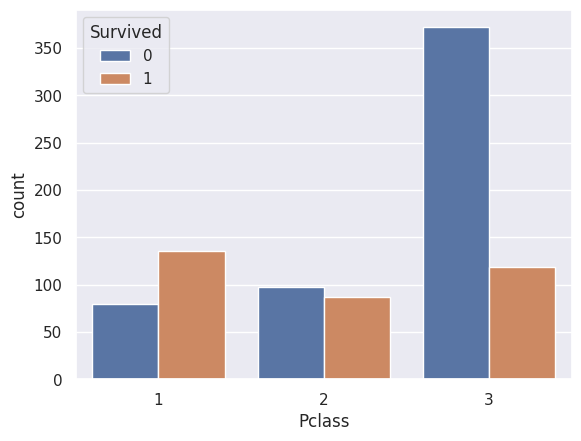

In [14]:
sns.countplot(data=df_train, x="Pclass", hue="Survived")

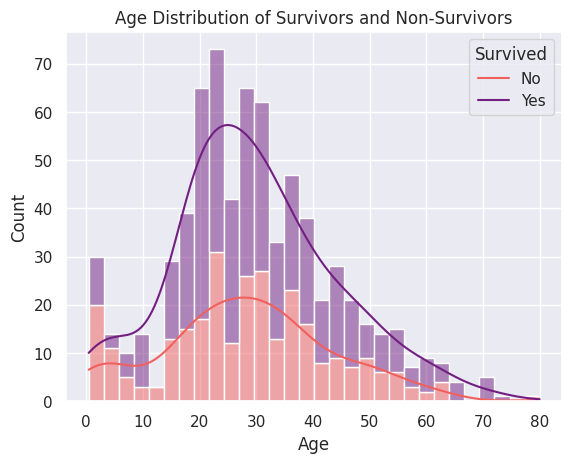

In [15]:
# Plot the age distribution of survivors vs non-survivors

sns.histplot(data=df_train, x='Age', hue='Survived', multiple='stack', bins=30, kde=True, palette='magma')
plt.title('Age Distribution of Survivors and Non-Survivors')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

**Taking care of missing values and converting the "Embarked" column into numeric data with One Hot Encoding.**

In [16]:
df_all['Relatives'] = df_all['SibSp'] + df_all['Parch']

In [17]:
df_all['Fare'] = df_all['Fare'].fillna(0)

In [18]:
for dataset in df_all:
    mean = df_all['Age'].mean()
    std = df_all['Age'].std()
    is_null = df_all['Age'].isnull().sum()
    # Compute random number between mean , std and is_null
    rand_age = np.random.randint(mean - std, mean + std, is_null)
    age_slice = df_all['Age'].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    df_all['Age'] = age_slice
    df_all['Age'] = df_all['Age'].astype(int)
    
df_all['Age'].isnull().sum()

0

In [19]:
# deleting the Cabin column since too many values are missing,  other columns do not have any statistical value for future predictions
df_all.drop(columns=['Embarked','Cabin', 'Survived', 'Ticket', 'Name', 'PassengerId', 'SibSp', 'Parch'], inplace=True)

In [20]:
X = df_all.values
df_all.head()

,Pclass,Sex,Age,Fare,Relatives
0,0,0,22,7.2500,1
1,2,1,38,71.2833,1
2,0,1,26,7.9250,0
3,2,1,35,53.1000,1
4,0,0,35,8.0500,0


**I have tried to transform the 'Pclass', 'Sex' and 'Embarked' columns both with Label Encoding and One Hot encoding. The results were the best with 'Pclass' and 'Sex' being Label Encoded, and 'Embarked' as One Hot.**<br><br>
*The first two mentioned columns have been transformed earlier above.*

In [21]:
# from sklearn.preprocessing import LabelEncoder

# le = LabelEncoder()
# X[:, 4] = le.fit_transform(X[:, 4])

In [22]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# convert the Sex and Embarked columns into numeric data
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [4])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

print(X[0])

[ 0.    1.    0.    0.    0.    0.    0.    0.    0.    0.    0.   22.
  7.25]


According to the previous cells we could fill the missing values of **Age and Fare** columns by using mean value. Although that would not work for the **Cabin** column since it's type is alphanumerical, no descriptive statistical measures could be applied.

**Splitting the dataset to Train, Cross-Validation and Test sets.**

In [23]:
from sklearn.model_selection import train_test_split

# assigning the 'Survived' column values to our y set
y = df_train.iloc[:, 1].values
# Splitting the X set to X(values from the 'train.csv' file) and X_test(from 'test.csv')
X_test = X[891:]

X_train, X_val, y_train, y_val = train_test_split(X[:891], y, test_size = 0.1)

In [24]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_val = sc.transform(X_val)
X_test = sc.transform(X_test)

X_= sc.fit_transform(X)

**Applying kernel PCA for dimensionality reduction** <br>
*Did not work so well, but just keeping it in case anyone interested.*

In [25]:
# from sklearn.decomposition import KernelPCA

# kpca = KernelPCA(n_components = 4, kernel = 'rbf')
# X_train = kpca.fit_transform(X_train)
# X_val = kpca.transform(X_val)
# X_test = kpca.transform(X_test)

**Logistic Regression**

In [26]:
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

In [27]:
from sklearn.metrics import confusion_matrix, accuracy_score

y_pred = classifier.predict(X_val)
cm = confusion_matrix(y_val, y_pred)
print(cm)
accuracy_score(y_val, y_pred)

[[44  9]
 [14 23]]


0.7444444444444445

In [28]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [29]:
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 80.16 %
Standard Deviation: 3.66 %


**The Naive Bayes Model**

In [30]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [31]:
y_pred = classifier.predict(X_val)
cm = confusion_matrix(y_val, y_pred)
print(cm)
accuracy_score(y_val, y_pred)

[[ 3 50]
 [ 0 37]]


0.4444444444444444

In [32]:
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 41.33 %
Standard Deviation: 3.10 %


**Support Vector Machine (SVM)**

In [33]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear')
classifier.fit(X_train, y_train)

SVC(kernel='linear')

In [34]:
y_pred = classifier.predict(X_val)
cm = confusion_matrix(y_val, y_pred)
print(cm)
accuracy_score(y_val, y_pred)

[[46  7]
 [14 23]]


0.7666666666666667

In [35]:
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 80.04 %
Standard Deviation: 4.65 %


**Kernel SVM**     

In [36]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', gamma = 0.9, C = 0.75)
classifier.fit(X_train, y_train)

SVC(C=0.75, gamma=0.9)

In [37]:
y_pred = classifier.predict(X_val)
cm = confusion_matrix(y_val, y_pred)
print(cm)
accuracy_score(y_val, y_pred)

[[46  7]
 [12 25]]


0.7888888888888889

In [38]:
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 80.28 %
Standard Deviation: 4.06 %


**K-Nearest Neighbors (K-NN)**

In [39]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 10, metric = 'minkowski', p = 2, leaf_size=20, weights='uniform')
classifier.fit(X_[:891, :], y)

KNeighborsClassifier(leaf_size=20, n_neighbors=10)

In [40]:
y_pred = classifier.predict(X_val)
cm = confusion_matrix(y_val, y_pred)
print(cm)
accuracy_score(y_val, y_pred)

[[49  4]
 [13 24]]


0.8111111111111111

In [41]:
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 78.78 %
Standard Deviation: 3.16 %


In [42]:
parameters = [{
    'n_neighbors': (1,10, 1),
    'leaf_size': (20,40,1),
    'p': (1,2),
    'weights': ('uniform', 'distance'),
    'metric': ('minkowski', 'chebyshev'),},
             ]
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search.fit(X_train[:, :], y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 79.40 %
Best Parameters: {'leaf_size': 20, 'metric': 'minkowski', 'n_neighbors': 10, 'p': 1, 'weights': 'distance'}


**The Decision Tree Classification model**

In [43]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy')
classifier.fit(X_[:891, :], y)

DecisionTreeClassifier(criterion='entropy')

In [44]:
y_pred = classifier.predict(X_val)
cm = confusion_matrix(y_val, y_pred)
print(cm)
accuracy_score(y_val, y_pred)

[[49  4]
 [ 4 33]]


0.9111111111111111

In [45]:
accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 78.40 %
Standard Deviation: 3.69 %


**Random Forest Classification**   <h2> 98% for train set!! Although not in cross-validation.</h2>

In [46]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 50, criterion = 'gini')
classifier.fit(X_[:891, :], y)

RandomForestClassifier(n_estimators=50)

In [47]:
y_pred = classifier.predict(X_[:891, :])
cm = confusion_matrix(y, y_pred)
print(cm)
accuracy_score(y, y_pred)

[[547   2]
 [ 16 326]]


0.9797979797979798

In [48]:
accuracies = cross_val_score(estimator = classifier, X = X_[:891, :], y = y, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 79.92 %
Standard Deviation: 4.27 %


In [49]:
parameters = [{#'n_estimators': [10, 100, 50, 200],
               'criterion': ['gini', 'entropy', 'log_loss']
              },
             ]
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search.fit(X_train[:, :], y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 82.53 %
Best Parameters: {'criterion': 'gini'}


**XGBoost**

In [50]:
from xgboost import XGBClassifier
classifier = XGBClassifier(eta=0.1, reg_lambda=0.001, gamma=1.5, max_depth=10, min_child_weight=5, reg_alpha=0.01)
classifier.fit(X_[:891, :], y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eta=0.1, eval_metric=None,
              feature_types=None, gamma=1.5, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=10,
              max_leaves=None, min_child_weight=5, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [51]:
y_pred = classifier.predict(X_[:891, :])
cm = confusion_matrix(y, y_pred)
print(cm)
accuracy_score(y, y_pred)

[[513  36]
 [ 87 255]]


0.8619528619528619

In [52]:
accuracies = cross_val_score(estimator = classifier, X = X_[:891, :], y = y, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 81.95 %
Standard Deviation: 5.38 %


In [53]:
parameters = [{
    'reg_alpha':[0, 0.001, 0.005, 0.01, 0.05]
#     'subsample':[i/10.0 for i in range(6,10)],
#  'colsample_bytree':[i/10.0 for i in range(6,10)]
    #'min_child_weight': [1, 5, 10],
        #'gamma': [0.5, 1, 1.5, 2, 5],
        #'subsample': [0.6, 0.8, 1.0],
        #'colsample_bytree': [0.6, 0.8, 1.0],
    #'eta': [0.1, 0.3, 0.01, 0.001], 
               #'max_depth': [3, 6, 10, 30, 50], 
    #'lambda': [0.001, 0.1, 0.5, 0.9]
              },
             ]
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 82.41 %
Best Parameters: {'reg_alpha': 0.005}


In [54]:
from catboost import CatBoostClassifier
classifier = CatBoostClassifier(learning_rate=0.01, logging_level='Silent')
classifier.fit(X_[:891, :], y)

In [55]:
y_pred = classifier.predict(X_val)
cm = confusion_matrix(y_val, y_pred)
print(cm)
accuracy_score(y_val, y_pred)

[[51  2]
 [ 9 28]]


0.8777777777777778

In [56]:
accuracies = cross_val_score(estimator = classifier, X = X_[:891, :], y = y, cv = 10, verbose=False)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 84.63 %
Standard Deviation: 4.77 %


In [57]:
parameters = {#'depth'         : [4,5,6,7,8,9, 10],
                 #'learning_rate' : [0.01,0.02,0.03,0.04],
                  'iterations'    : [10, 20,30,40,50,60,70,80,90, 100]
                 }
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search.fit(X_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 80.91 %
Best Parameters: {'iterations': 60}


Applying Deep Learning since the best accuracy so far is 83%

In [58]:
y_test = classifier.predict(X_test)

In [59]:
submission = pd.read_csv('/kaggle/input/titanic/gender_submission.csv')
submission['Survived'] = y_test
submission[submission['Survived'] == 1].count()

PassengerId    134
Survived       134
dtype: int64

In [60]:
submission.to_csv('submission.csv', index=False)

In [61]:
import tensorflow as tf

In [62]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import relu,sigmoid
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam

In [63]:
ann = tf.keras.models.Sequential(
    [
        Dense(units=8, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        Dense(units=64, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        Dense(units=124, activation='linear',kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        Dense(units=1, activation='sigmoid')
    ]
)

In [64]:
ann.compile(optimizer = Adam(lr=0.001), loss = 'binary_crossentropy', metrics = ['accuracy'])

In [65]:
ann.fit(X_[:891, :], y, batch_size = 32, epochs = 100)

Epoch 1/100
28/28 [==============================] - 1s 3ms/step - loss: 1.5717 - accuracy: 0.6689
Epoch 2/100
28/28 [==============================] - 0s 3ms/step - loss: 1.2314 - accuracy: 0.7710
Epoch 3/100
28/28 [==============================] - 0s 3ms/step - loss: 1.0034 - accuracy: 0.7980
Epoch 4/100
28/28 [==============================] - 0s 2ms/step - loss: 0.8520 - accuracy: 0.8036
Epoch 5/100
28/28 [==============================] - 0s 2ms/step - loss: 0.7536 - accuracy: 0.8047
Epoch 6/100
28/28 [==============================] - 0s 3ms/step - loss: 0.6857 - accuracy: 0.8058
Epoch 7/100
28/28 [==============================] - 0s 3ms/step - loss: 0.6361 - accuracy: 0.8036
Epoch 8/100
28/28 [==============================] - 0s 3ms/step - loss: 0.6049 - accuracy: 0.8047
Epoch 9/100
28/28 [==============================] - 0s 3ms/step - loss: 0.5793 - accuracy: 0.8070
Epoch 10/100
28/28 [==============================] - 0s 3ms/step - loss: 0.5614 - accuracy: 0.8036
Epoch 11/

In [66]:
y_pred = ann.predict(X_[:891, :])
y_pred = y_pred > 0.5

28/28 [==============================] - 0s 2ms/step


In [67]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y, y_pred)
print(cm)
accuracy_score(y, y_pred)

[[482  67]
 [ 85 257]]


0.8294051627384961

In [68]:
y_test = ann.predict(X_test)
y_test = (y_test > 0.5).astype(int)

14/14 [==============================] - 0s 2ms/step


In [69]:
X_test.shape

(418, 13)